## Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
import shap
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
os.chdir('c:/users/fre_f/pythonprojects/bacteriological/')

In [3]:
df = pd.read_csv('./data/final/04_genus_dedornot_ra.csv')

In [4]:
df.head()

,Index,Patient=1,Corynebacterium,Staphylococcus,Propionibacterium,sp50014,Moraxella,Blautia,sp50017,sp5276,...,Intrasporangium,sp10518,sp44151,Limnobacter,Gender F=1,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,P1,1,0.092816,0.001058,0.042075,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0,1,65,0,0,NaN,NaN
1,P2,1,0.698862,0.001191,0.004366,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0,1,67,0,0,31.25,17.0
2,P3,1,0.034017,0.259365,0.003640,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0,1,33,0,0,33.30,16.0
3,P4,1,0.029042,0.177362,0.015877,0.0,0.0,0.127216,0.0,0.000000,...,0.0,0.0,0.0,0,1,66,0,0,93.75,21.0
4,P5,1,0.307662,0.164086,0.050351,0.0,0.0,0.000331,0.0,0.000463,...,0.0,0.0,0.0,0,0,69,0,0,6.25,7.0


In [5]:
df.iloc[:,2:600]

,Corynebacterium,Staphylococcus,Propionibacterium,sp50014,Moraxella,Blautia,sp50017,sp5276,Finegoldia,Acinetobacter,...,Dyella,Actinopolymorpha,Trichococcus,melongena,Methylophilus,Murdochiella,Intrasporangium,sp10518,sp44151,Limnobacter
0,0.092816,0.001058,0.042075,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.006020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.698862,0.001191,0.004366,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.034017,0.259365,0.003640,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.029042,0.177362,0.015877,0.000000,0.000000,0.127216,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.307662,0.164086,0.050351,0.000000,0.000000,0.000331,0.000000,0.000463,0.0,0.002183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.015879,0.130277,0.522496,0.000000,0.001456,0.000000,0.000595,0.042676,0.0,0.055313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
87,0.456597,0.420537,0.009461,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
88,0.158295,0.048375,0.097082,0.631328,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
89,0.565824,0.358825,0.053255,0.000000,0.000000,0.000000,0.000000,0.002117,0.0,0.001522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
df.iloc[:,1]

0     1
1     1
2     1
3     1
4     1
     ..
86    0
87    0
88    0
89    0
90    0
Name: Patient=1, Length: 91, dtype: int64

In [7]:
X = df.iloc[:,2:600]
y = df.iloc[:,1]

## Train, predict and explain

### XGBoost

In [8]:
clfxgb = XGBClassifier(random_state=42)
clfxgb.fit(X, y)
y_predxgb = clfxgb.predict(X)

In [9]:
print('Accuracy:',accuracy_score(y, y_predxgb))
print('Balanced accuracy: ',balanced_accuracy_score(y, y_predxgb))
print('F1 score:',f1_score(y, y_predxgb,average='weighted'))
print('MCC:', matthews_corrcoef(y, y_predxgb))
print(confusion_matrix(y, y_predxgb))

Accuracy: 1.0
Balanced accuracy:  1.0
F1 score: 1.0
MCC: 1.0
[[30  0]
 [ 0 61]]


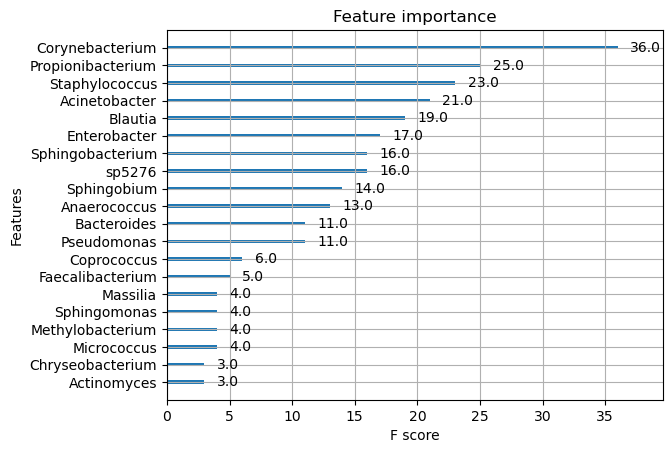

In [10]:
fig, ax = plt.subplots()
plot_importance(clfxgb, max_num_features = 20, ax=ax)
plt.title('Feature importance')

plt.show()

In [11]:
# Create a SHAP explainer for the XGBoost model
explainerxgb = shap.Explainer(clfxgb, X)

# Compute SHAP values for the dataset
shap_valuesxgb = explainerxgb(X)

[20:47:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [12]:
shap_valuesxgb.shape

(91, 598)

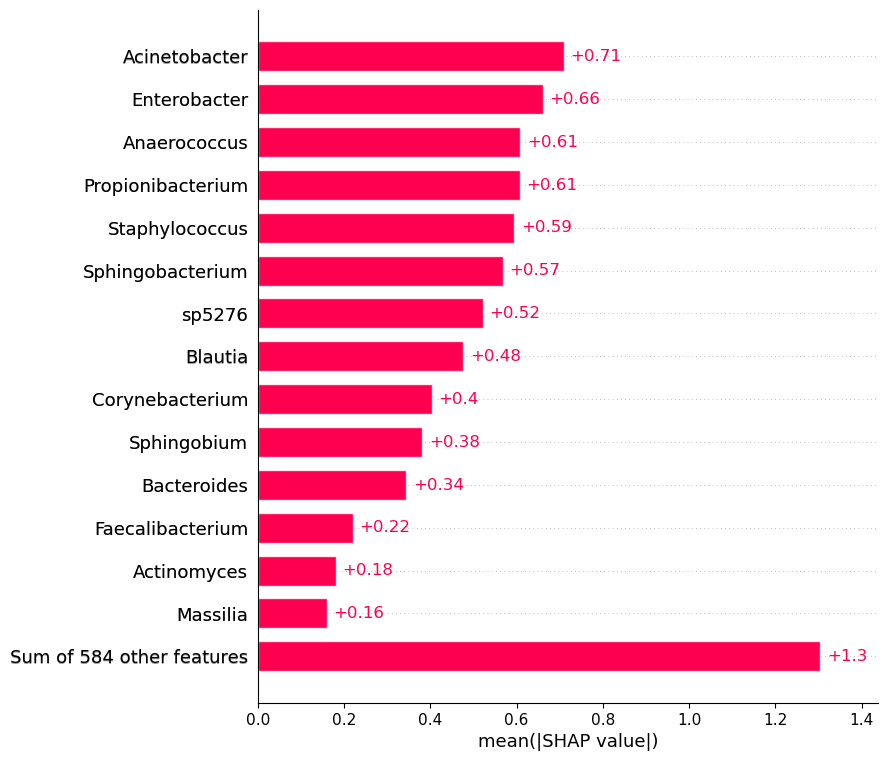

In [13]:
# Plot the SHAP summary plot

shap.plots.bar(shap_valuesxgb, max_display=15)

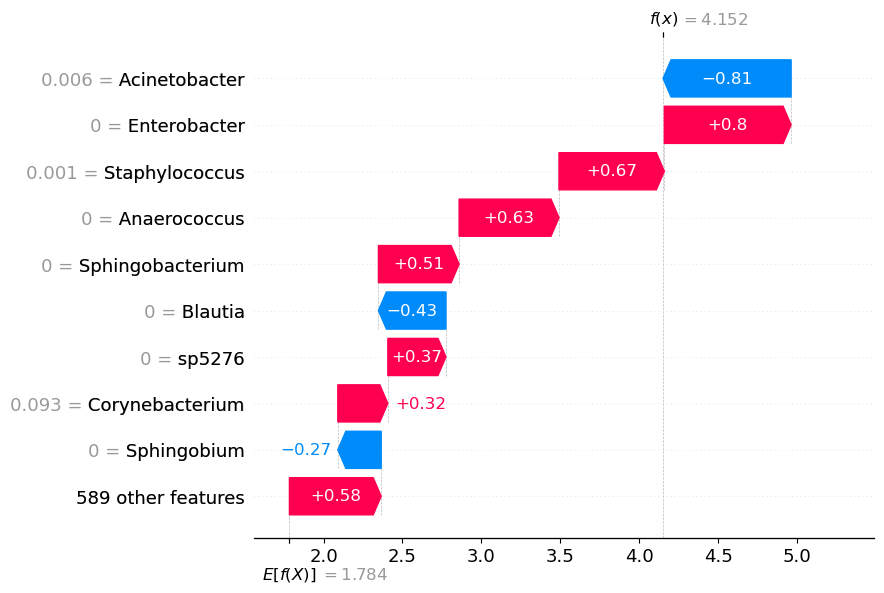

In [14]:
# Plot the SHAP decision plot for a specific instance
# Replace 'instance_index' with the index of the instance you want to visualize
instance_index = 0  # Example instance index
shap.plots.waterfall(shap_valuesxgb[instance_index])

### LightGBM

In [15]:
clflgbm = LGBMClassifier(random_state=42)
clflgbm.fit(X, y)
y_predlgbm = clflgbm.predict(X)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 61, number of negative: 30
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 91, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.670330 -> initscore=0.709676
[LightGBM] [Info] Start training from score 0.709676
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [16]:
print('Accuracy:',accuracy_score(y, y_predlgbm))
print('Balanced accuracy: ',balanced_accuracy_score(y, y_predlgbm))
print('F1 score:',f1_score(y, y_predlgbm,average='weighted'))
print('MCC:', matthews_corrcoef(y, y_predlgbm))
print(confusion_matrix(y, y_predlgbm))

Accuracy: 0.989010989010989
Balanced accuracy:  0.9918032786885246
F1 score: 0.9890556537352364
MCC: 0.9756420007311559
[[30  0]
 [ 1 60]]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

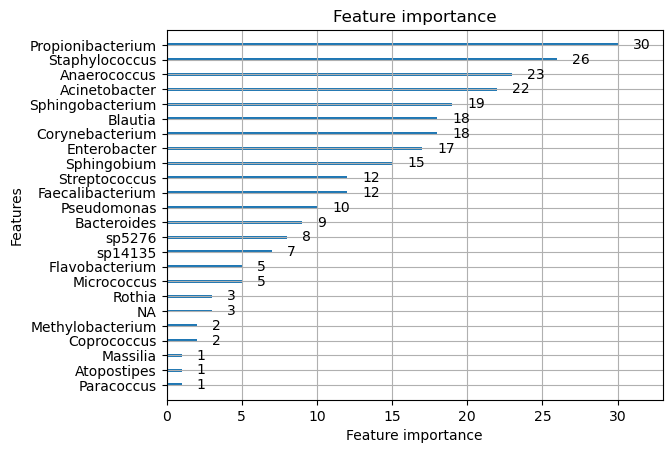

In [17]:
lgb.plot_importance(clflgbm)

In [18]:
# Create a SHAP explainer for the LightGBM model

explainerlgbm = shap.Explainer(clflgbm, X)

In [19]:
# Compute SHAP values for the dataset

shap_valueslgbm = explainerlgbm(X)

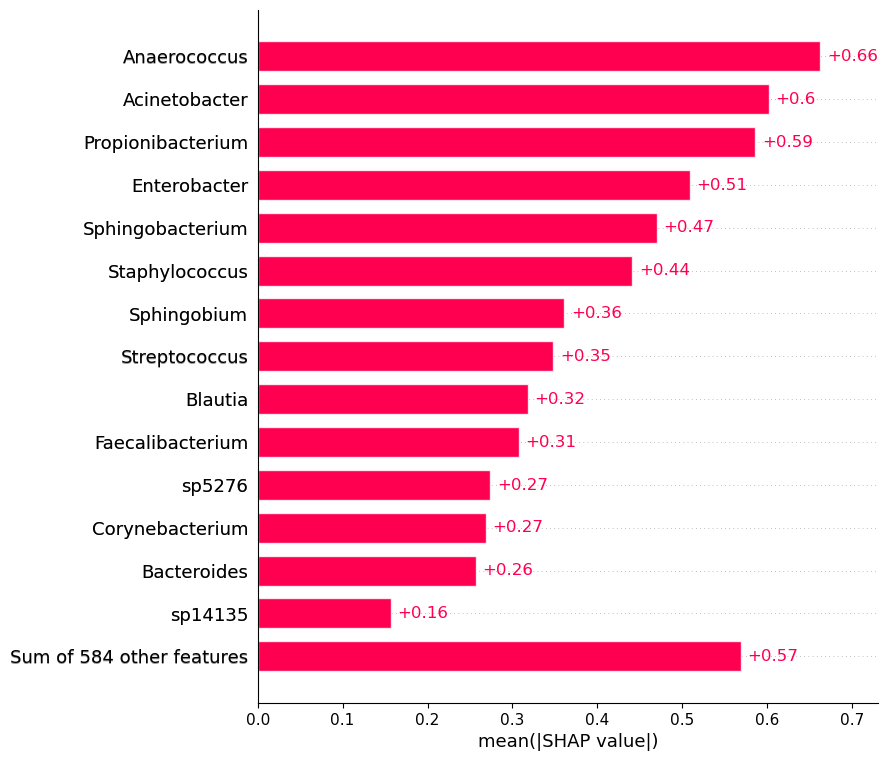

In [20]:
# Plot the SHAP summary plot

shap.plots.bar(shap_valueslgbm, max_display=15)

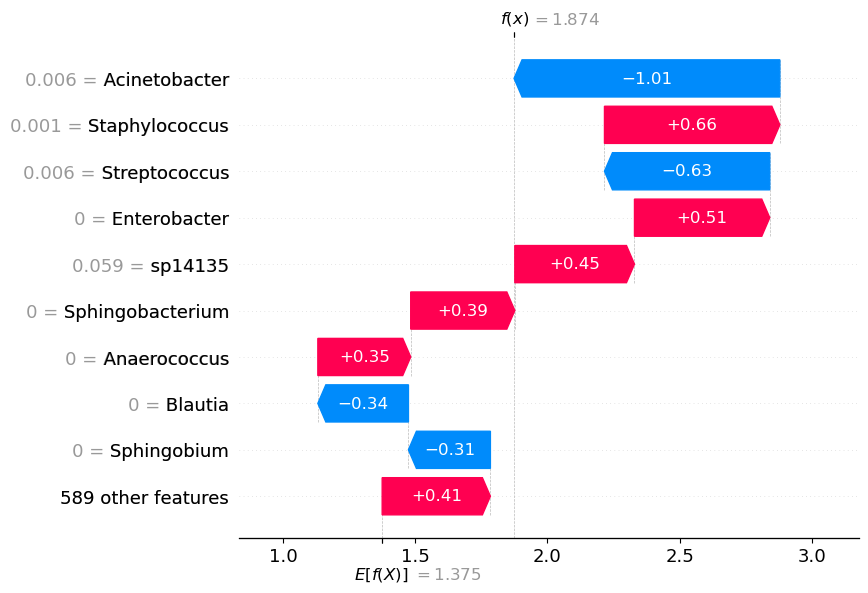

In [21]:
# Plot the SHAP decision plot for a specific instance
# Replace 'instance_index' with the index of the instance you want to visualize
instance_index = 0  # Example instance index
shap.plots.waterfall(shap_valueslgbm[instance_index])

### Multilayer perceptron

In [22]:

clfmlp = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=3000, verbose=False)
clfmlp.out_activation_="softmax"
clfmlp.fit(X, y)
y_predmlp = clfmlp.predict(X)

In [23]:
print('Accuracy:',accuracy_score(y, y_predmlp))
print('Balanced accuracy: ',balanced_accuracy_score(y, y_predmlp))
print('F1 score:',f1_score(y, y_predmlp,average='weighted'))
print('MCC:', matthews_corrcoef(y, y_predmlp))
print(confusion_matrix(y, y_predmlp))

Accuracy: 0.989010989010989
Balanced accuracy:  0.9833333333333334
F1 score: 0.9889625325755959
MCC: 0.9752308797496131
[[29  1]
 [ 0 61]]


In [24]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clfmlp,X, y,n_repeats=20, random_state = 42)

In [25]:
MLPfeatures = pd.DataFrame(clfmlp.feature_names_in_,columns=['Features'])
MLPfeatures['Importance_values'] = result.importances_mean.tolist()
#Sort by importance
MLPfeatures = MLPfeatures.sort_values(by = 'Importance_values',ascending=True)[-15:]
#Remove features with importance =0
MLPfeatures=MLPfeatures[MLPfeatures['Importance_values']!=0]

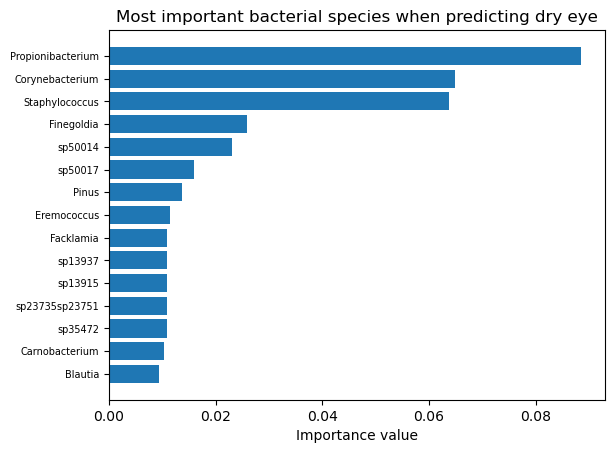

In [27]:
plt.title('Most important bacterial species when predicting dry eye')
plt.xlabel('Importance value')
plt.yticks(size=7)
plt.barh(MLPfeatures['Features'], MLPfeatures['Importance_values'], height=0.8)
plt.show()